In [1]:
import sys
#!{sys.executable} -m pip install numpy
#!{sys.executable} -m pip install cv2
#!{sys.executable} -m pip install matplotlib.pyplot
!{sys.executable} -m pip install pydicom
!{sys.executable} -m pip install scikit-image
import numpy as np
import cv2
import pydicom
import matplotlib.pyplot as plt
from skimage.filters import (threshold_otsu,sobel, threshold_triangle, threshold_niblack, threshold_sauvola)
from skimage import img_as_ubyte


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 5.4 MB/s eta 0:00:00


In [2]:
def make_jan(image, janelamento: list):
        """Janelamento : Lista com o valor mínimo e máximo de janela, transforma esse valor em um array numpy"""
        min_valor = min(janelamento)
        max_valor = max(janelamento)
        imagem_janelada = np.copy(image)
        imagem_janelada[image < min_valor] = min_valor
        imagem_janelada[image > max_valor] = max_valor
        return imagem_janelada

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Lendo a imagem médica

In [48]:
path =  r"/content/drive/MyDrive/PIM/Dicom/Paciente51 (13).dcm"
img_dc = pydicom.dcmread(path)

(array([0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 1.62033e+05, 0.00000e+00, 3.13000e+02,
        0.00000e+00, 3.54000e+02, 0.00000e+00, 3.68000e+02, 0.00000e+00,
        4.04000e+02, 0.00000e+00, 4.26000e+02, 0.00000e+00, 4.51000e+02,
        0.00000e+00, 4.88000e+02, 0.00000e+00, 5.10000e+02, 0.00000e+00,
        5.61000e+02, 0.00000e+00, 7.13000e+02, 0.00000e+00, 8.57000e+02,
        0.00000e+00, 1.05000e+03, 0.00000e+00, 1.40600e+03, 0.00000e+00,
        1.81500e+03, 0.00000e+00, 2.40100e+03, 0.00000e+00, 3.26600e+03,
        0.00000e+00, 3.71400e+03, 0.00000e+00, 4.34700e+03, 0.00000e+00,
        4.83600e+03, 0.00000e+00, 5.11500e+03, 0.00000e+00, 5.30500e+03,
        0.00000e+00, 5.16900e+03, 0.00000e+00, 4.85900e+03, 0.00000e+00,
        4.58200e+03, 0.00000e+00, 4.18900e+03, 0.00

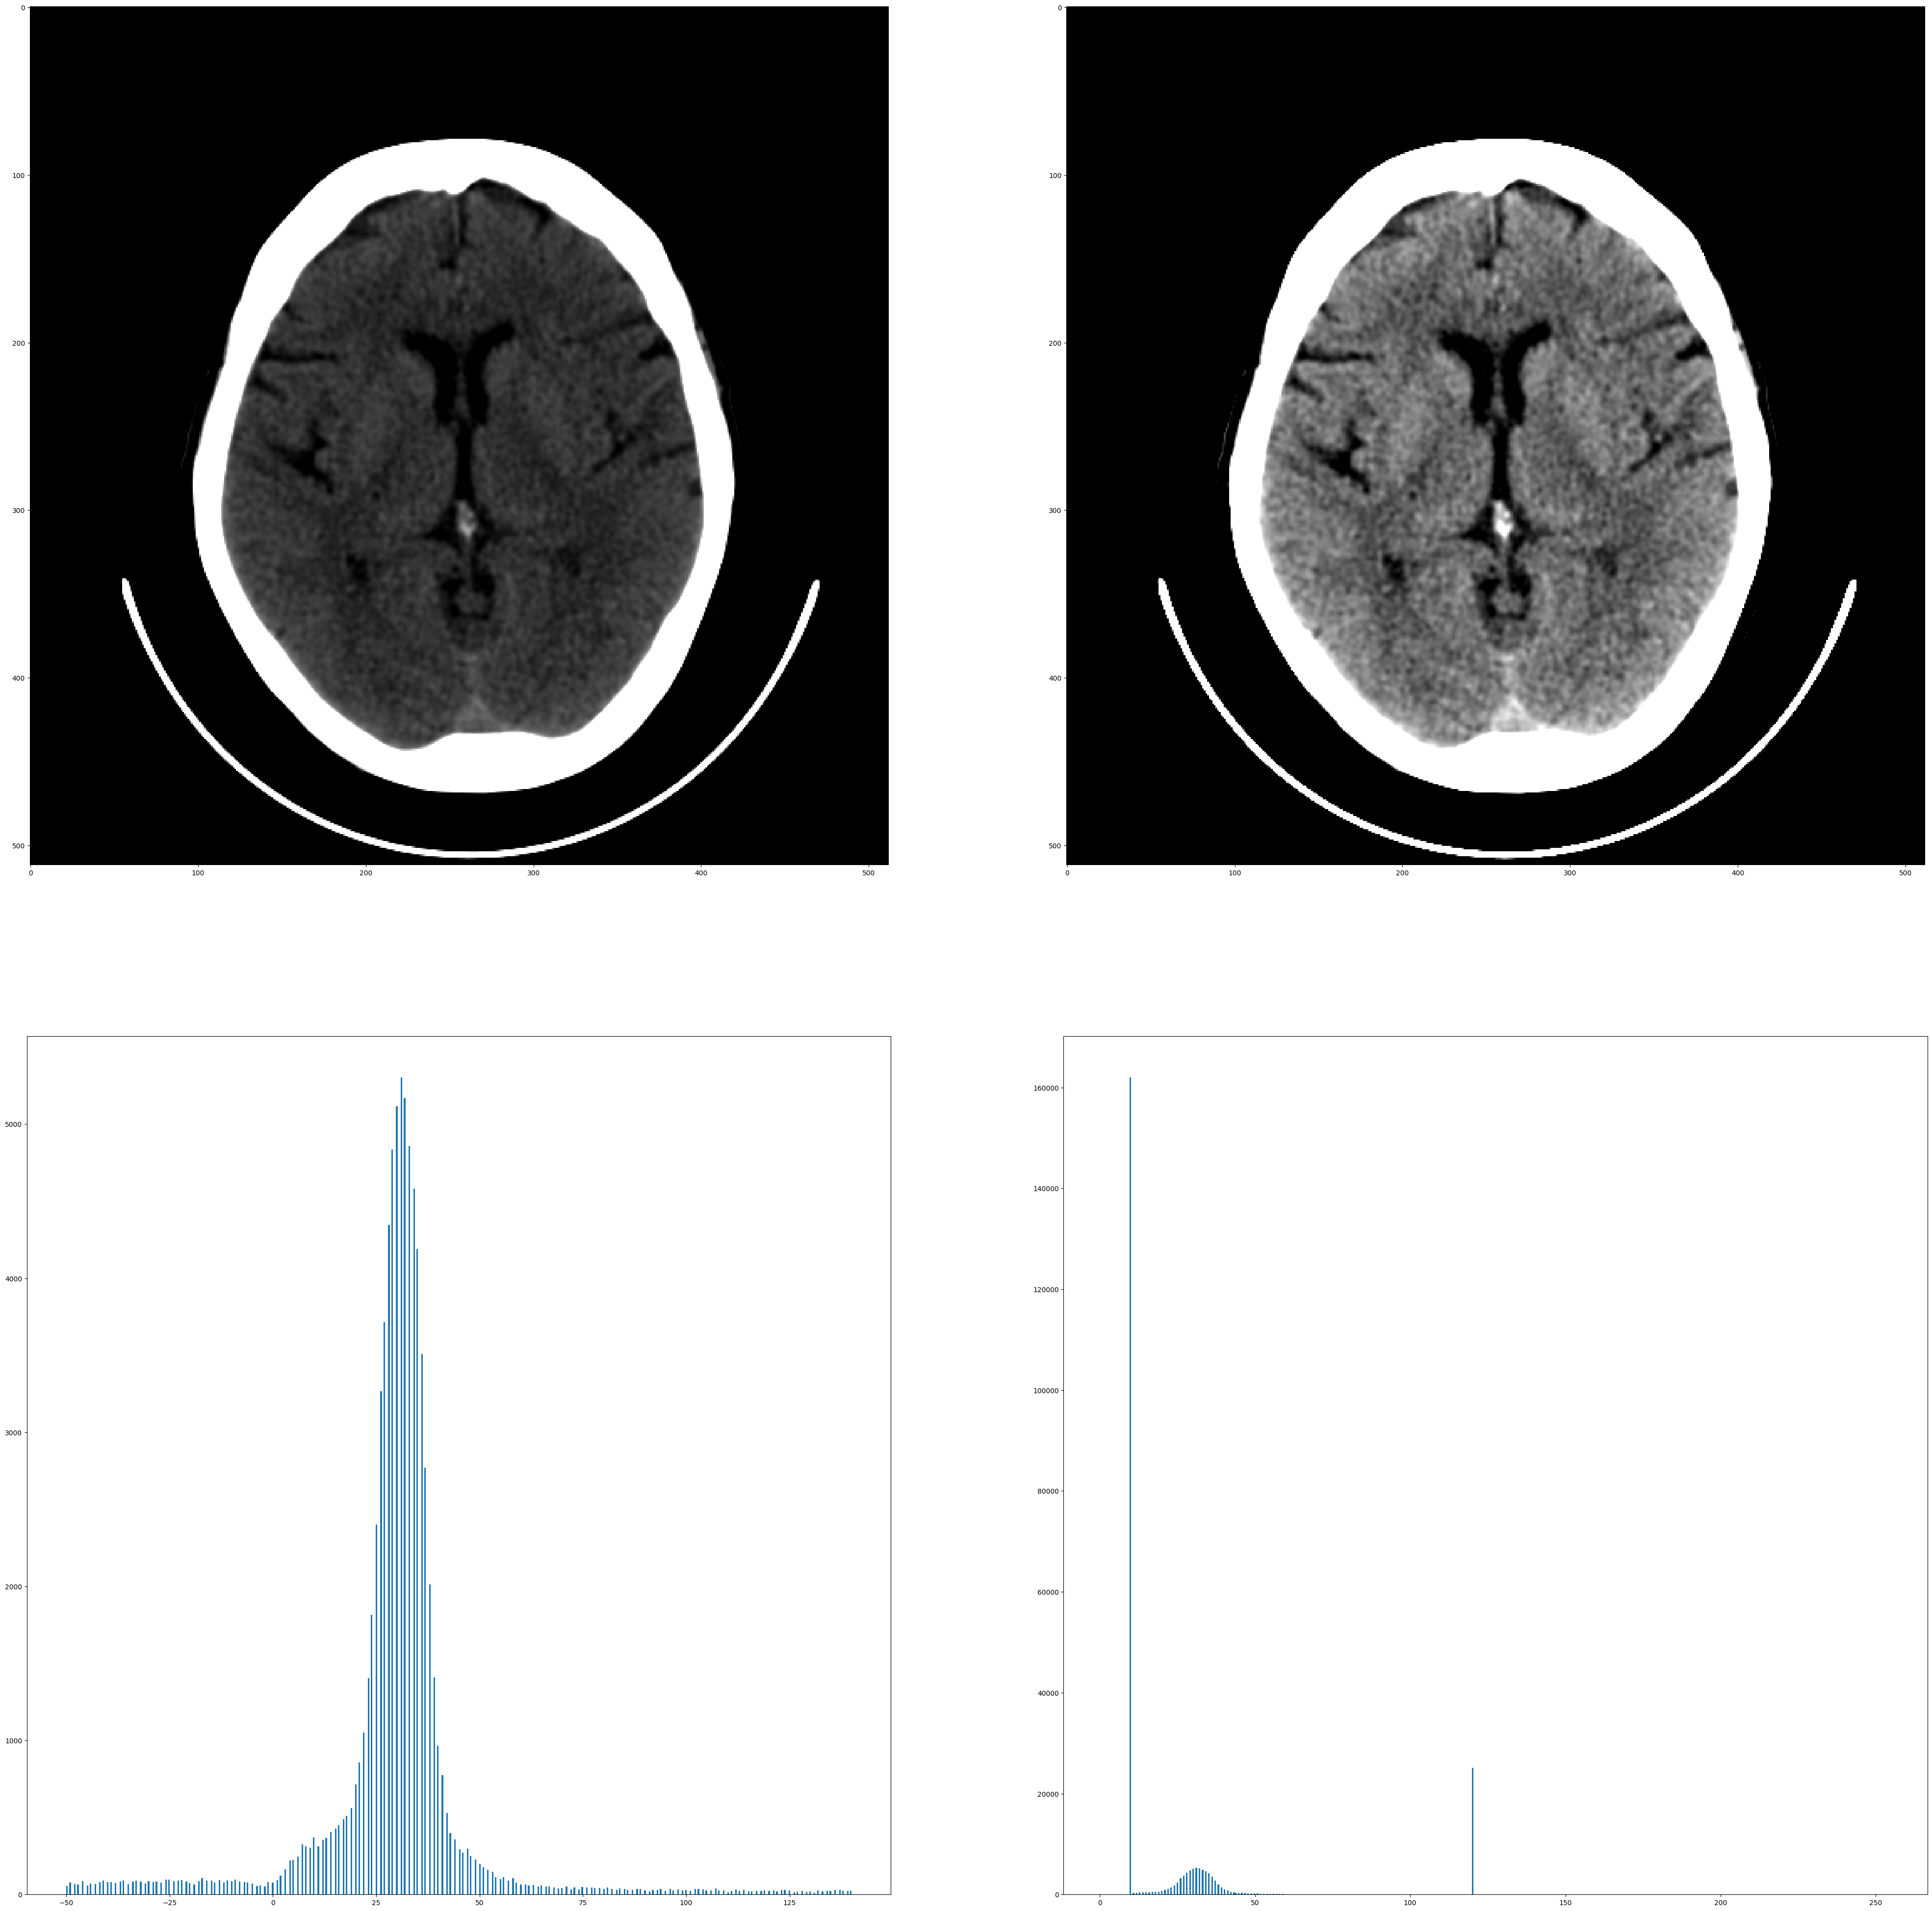

In [49]:
fig,ax = plt.subplots(2,2,figsize = (50,50))

janelamento = [10,120]
img_jan = make_jan(image = img_dc.pixel_array,janelamento = janelamento)

ax[0,0].imshow(img_jan,cmap = "gray")
ax[1,0].hist(img_dc.pixel_array.ravel(),500,[-50,140])


#janelamento2

janelamento2 = [10,60]
img_jan2 = make_jan(image = img_dc.pixel_array,janelamento = janelamento2)

ax[0,1].imshow(img_jan2,cmap = "gray")
ax[1,1].hist(img_jan.ravel(),500,[1,254])

In [50]:
janelamento

[10, 120]

In [ ]:
#np.max(img_jan)
#print(img_jan.shape())
#gray = cv2.cvtColor(img_jan, cv2.COLOR_BGR2GRAY)
#cv2.imshow("legenda",img_jan)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

### Fazendo a limiarização por otsu

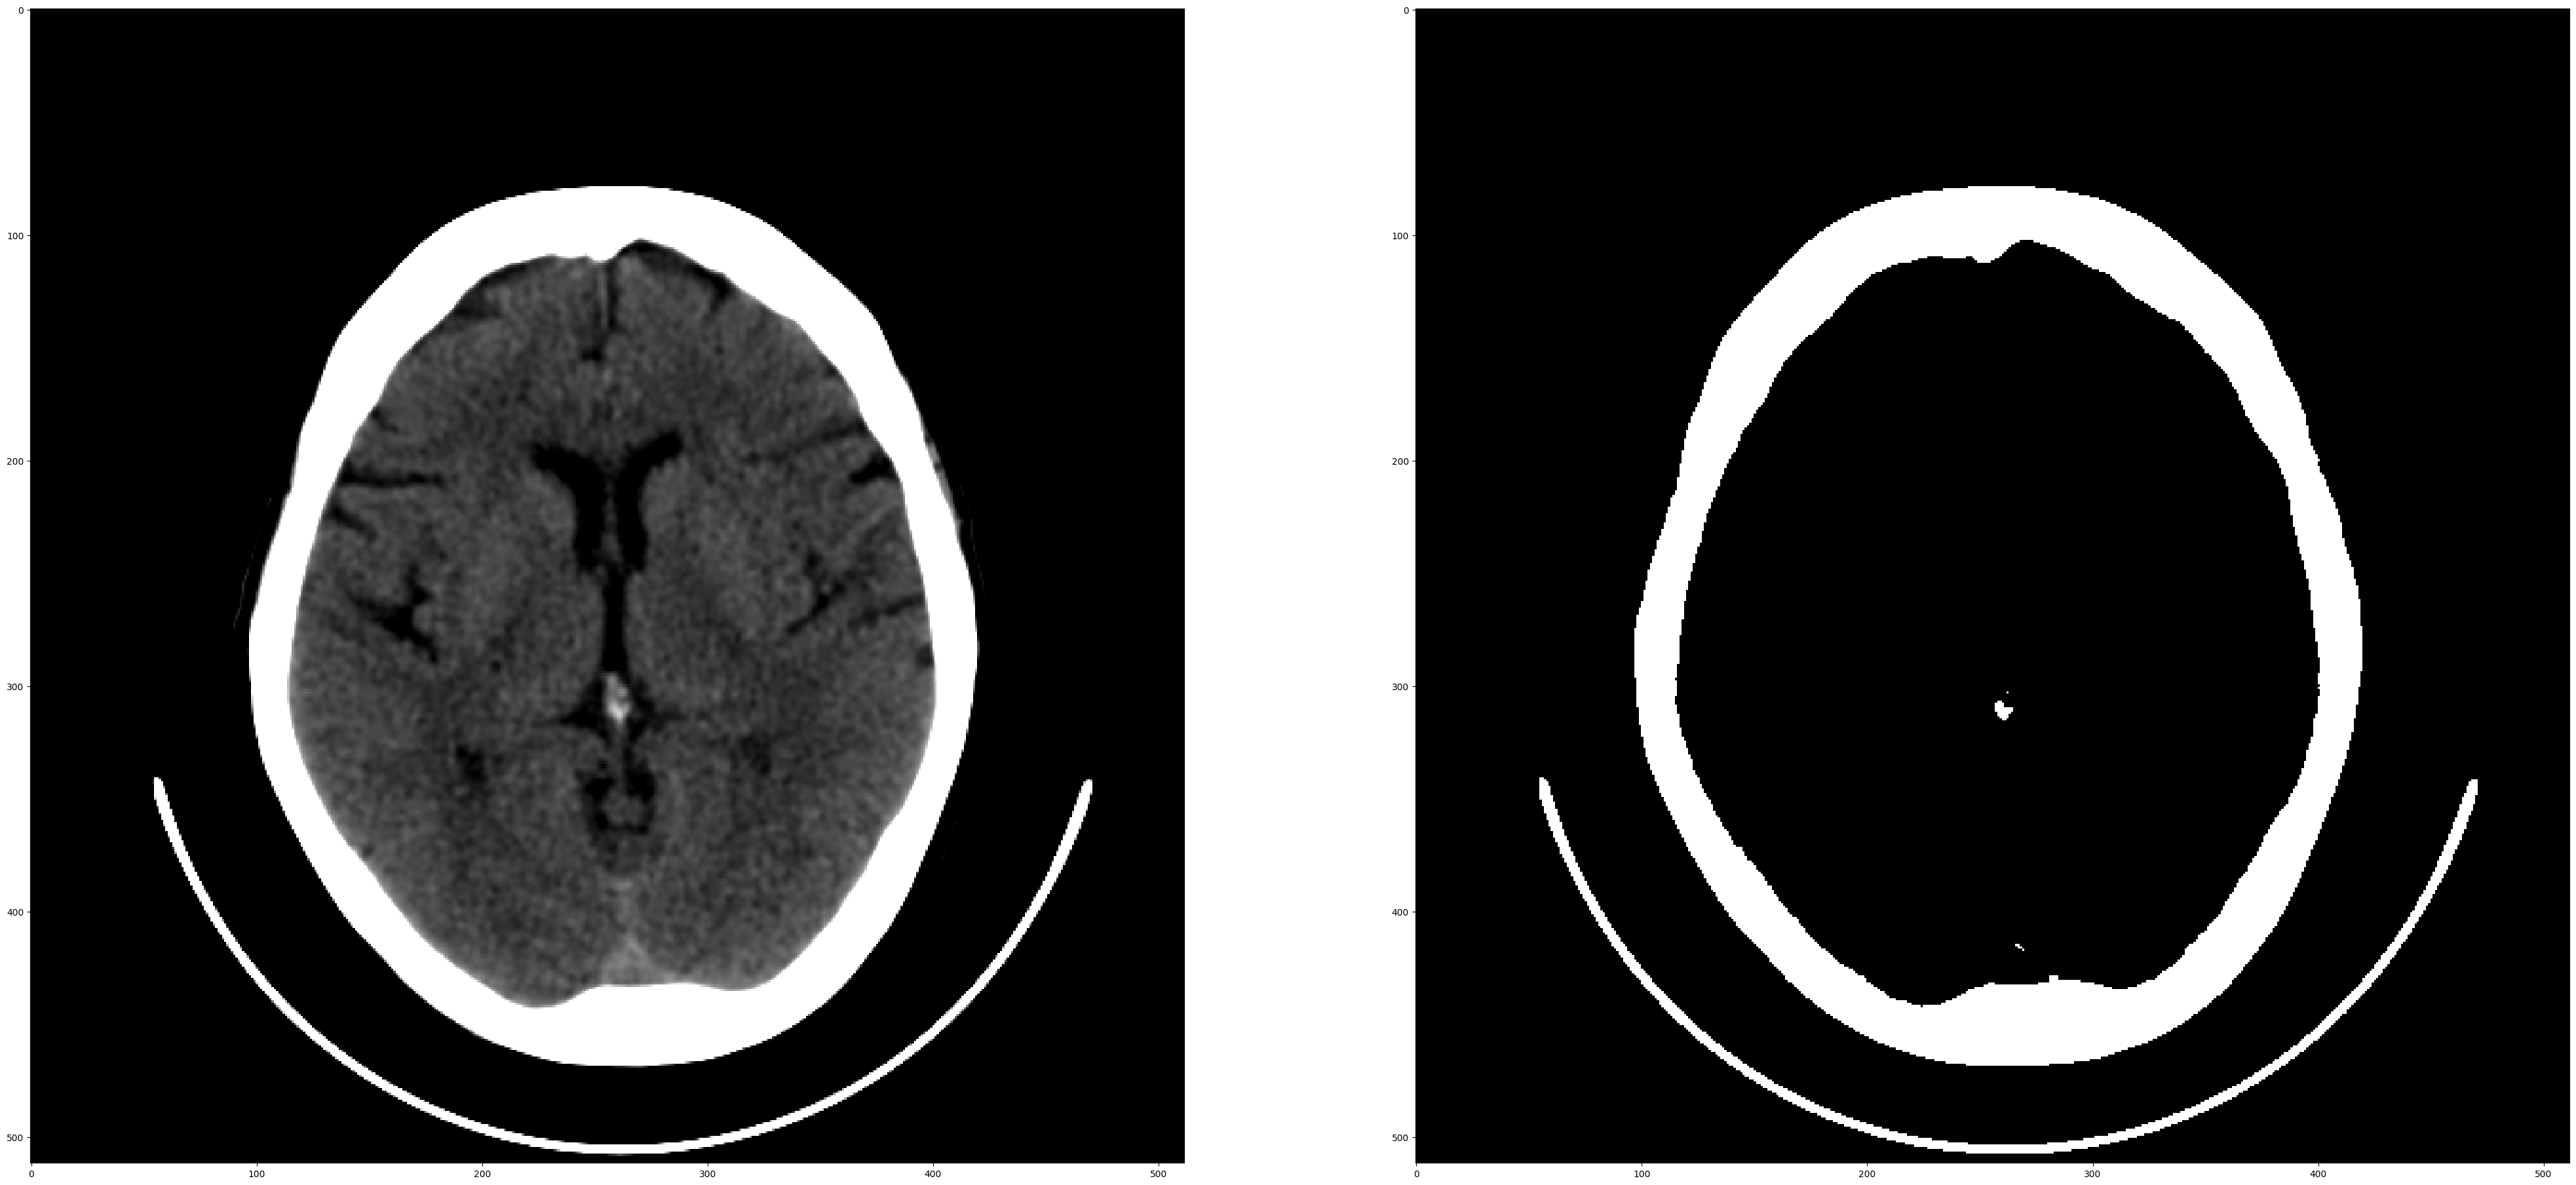

In [51]:
img = img_jan

janelamento_otsu = np.arange(10,100)
img_jan_otsu = make_jan(image = img_dc.pixel_array,janelamento = janelamento_otsu)
thresh_otsu = threshold_otsu(img_jan_otsu)
binary_img_1 = img_jan_otsu > thresh_otsu
binary_img_1 = img_as_ubyte(binary_img_1)
fig,ax = plt.subplots(1,2,figsize=(50,50))
ax[0].imshow(img_jan_otsu,cmap = "gray")
ax[1].imshow(binary_img_1,cmap = "gray")

### Aplicando sobel:

(array([  56.,    0.,   78.,    0.,    0.,   69.,    0.,   65.,    0.,
           0.,   88.,    0.,    0.,   59.,    0.,   72.,    0.,    0.,
          68.,    0.,    0.,   81.,    0.,   91.,    0.,    0.,   81.,
           0.,   79.,    0.,    0.,   73.,    0.,    0.,   83.,    0.,
          90.,    0.,    0.,   68.,    0.,    0.,   85.,    0.,   91.,
           0.,    0.,   85.,    0.,    0.,   71.,    0.,   87.,    0.,
           0.,   82.,    0.,   83.,    0.,    0.,   76.,    0.,    0.,
          96.,    0.,   97.,    0.,    0.,   87.,    0.,    0.,   91.,
           0.,   92.,    0.,    0.,   85.,    0.,   74.,    0.,    0.,
          66.,    0.,    0.,   88.,    0.,  107.,    0.,    0.,   90.,
           0.,    0.,   91.,    0.,   77.,    0.,    0.,   92.,    0.,
           0.,   77.,    0.,   91.,    0.,    0.,   87.,    0.,   97.,
           0.,    0.,   85.,    0.,    0.,   79.,    0.,   76.,    0.,
           0.,   70.,    0.,    0.,   56.,    0.,   57.,    0.,    0.,
      

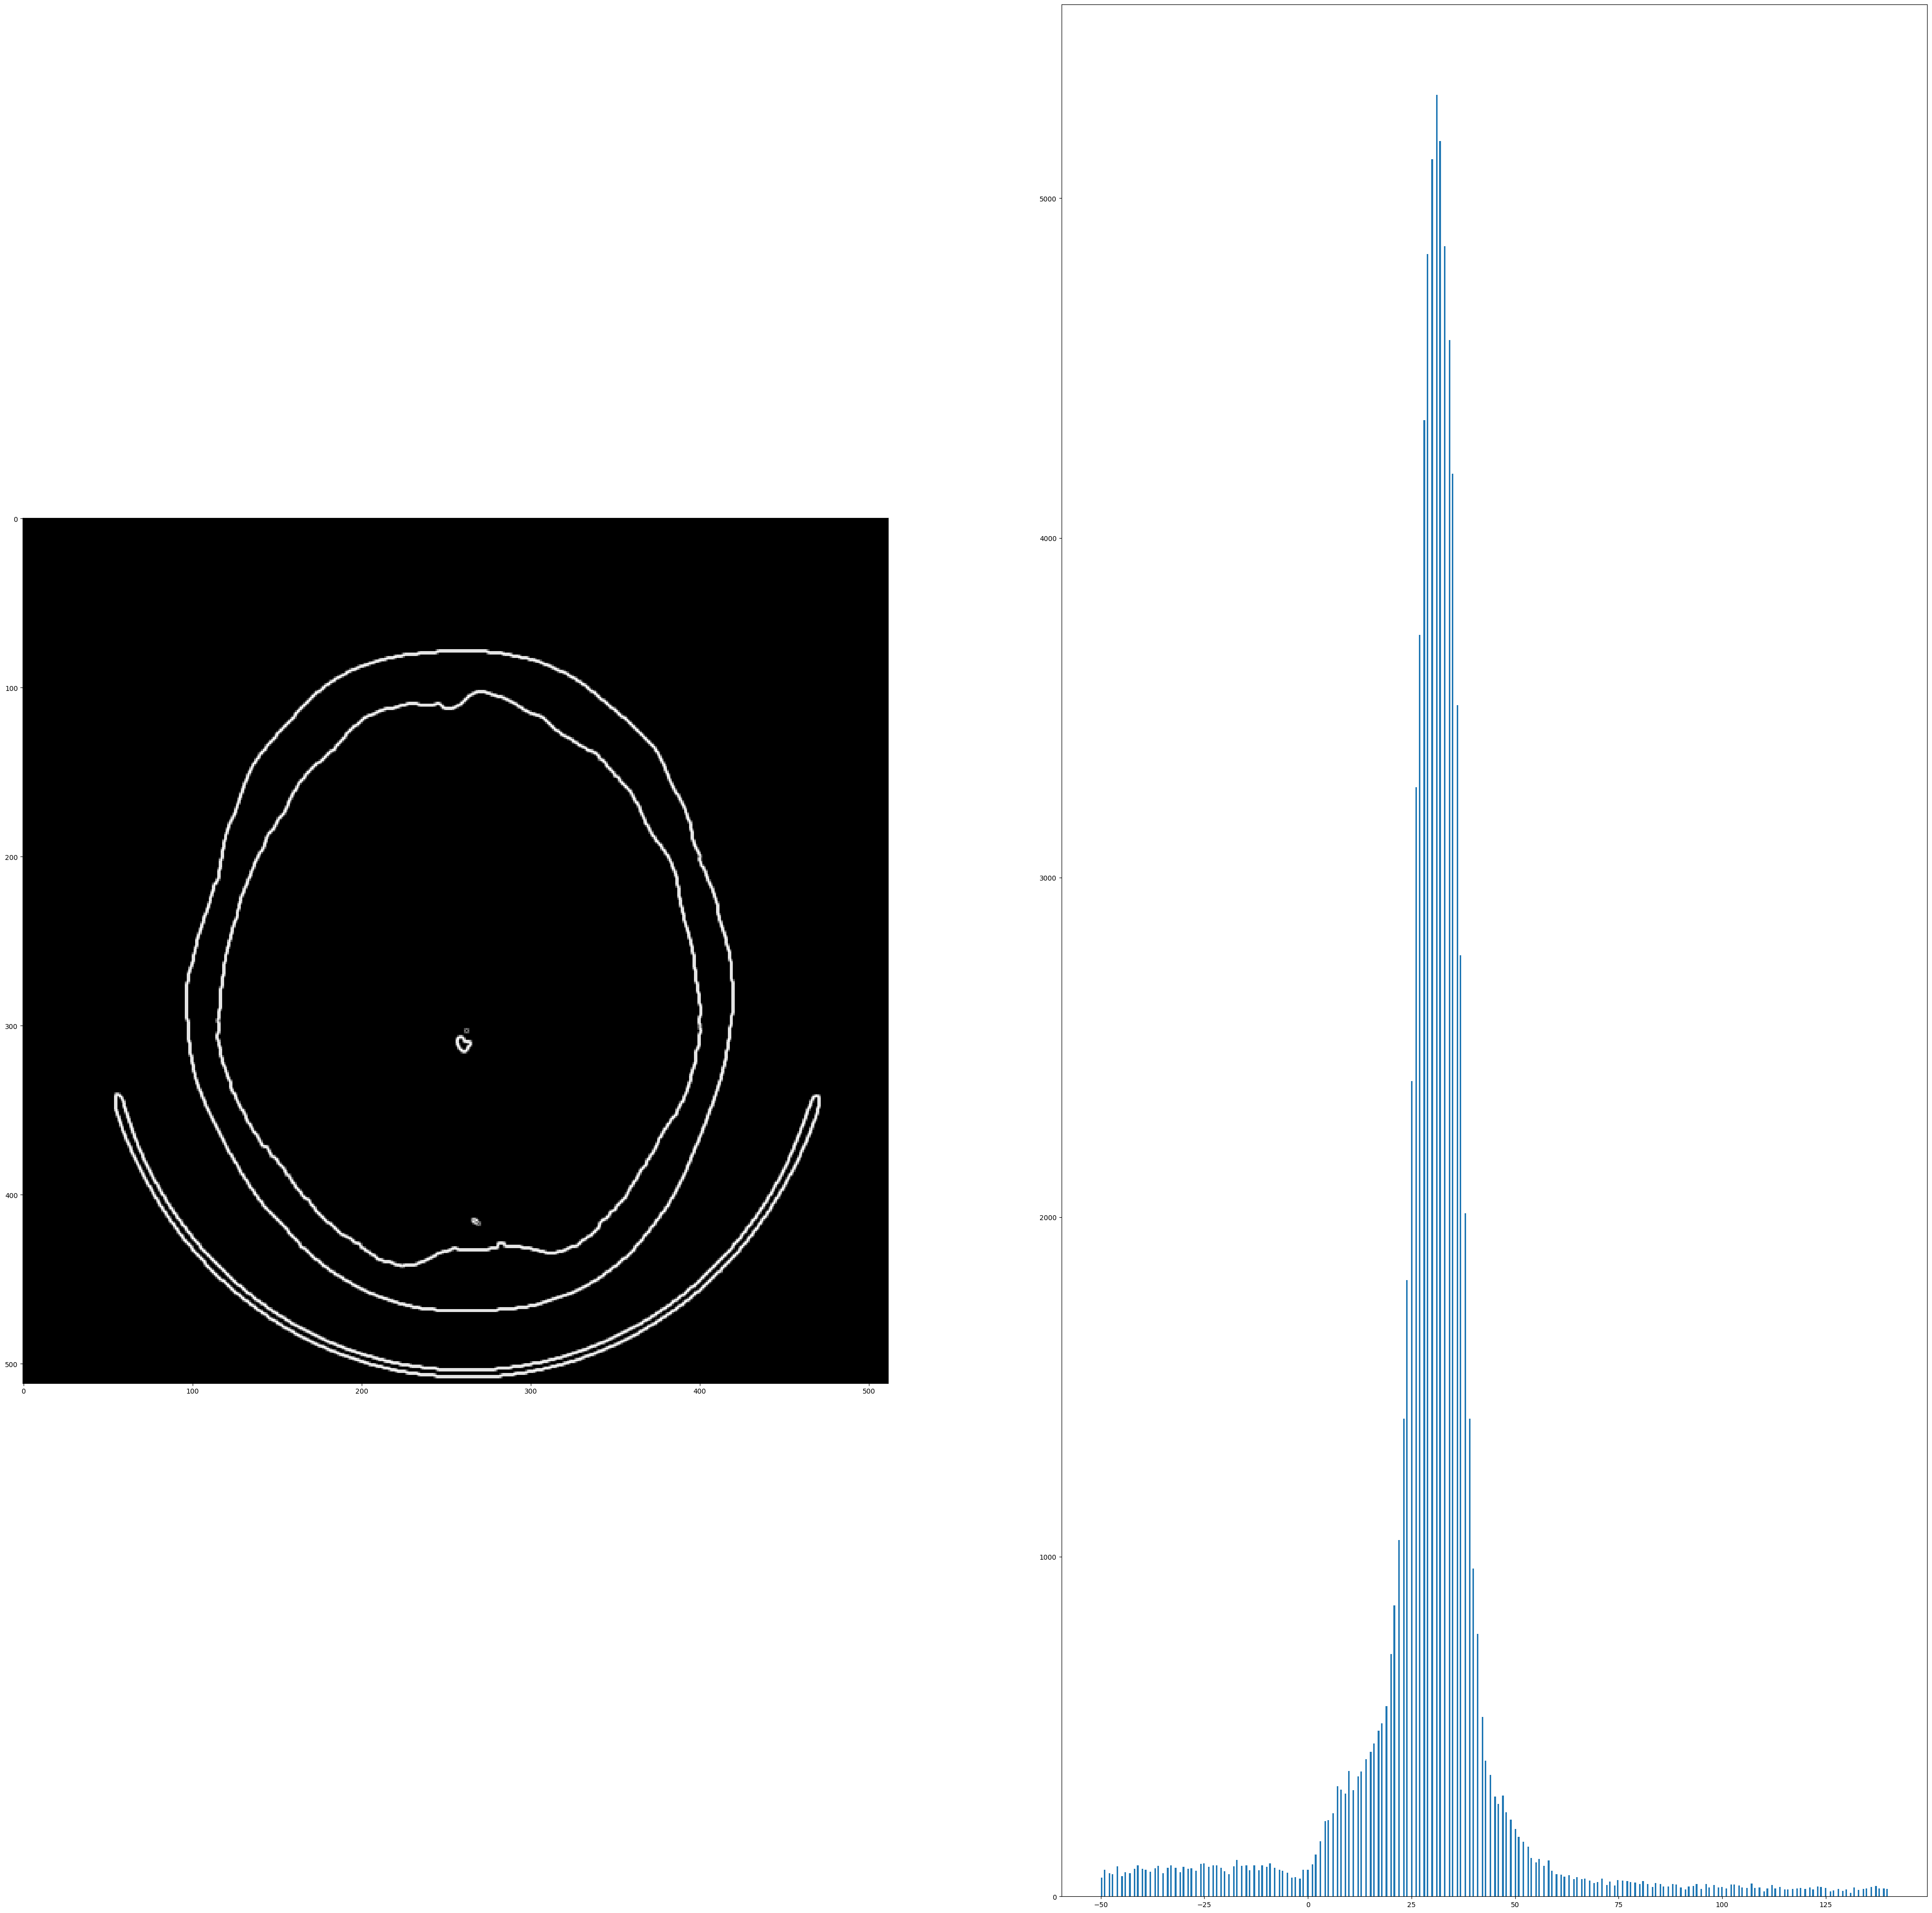

In [52]:
edges = sobel(binary_img_1)
fig,ax = plt.subplots(1,2,figsize=(50,50))
ax[0].imshow(edges,cmap = "gray")
ax[1].hist(img_dc.pixel_array.ravel(),500,[-50,140])


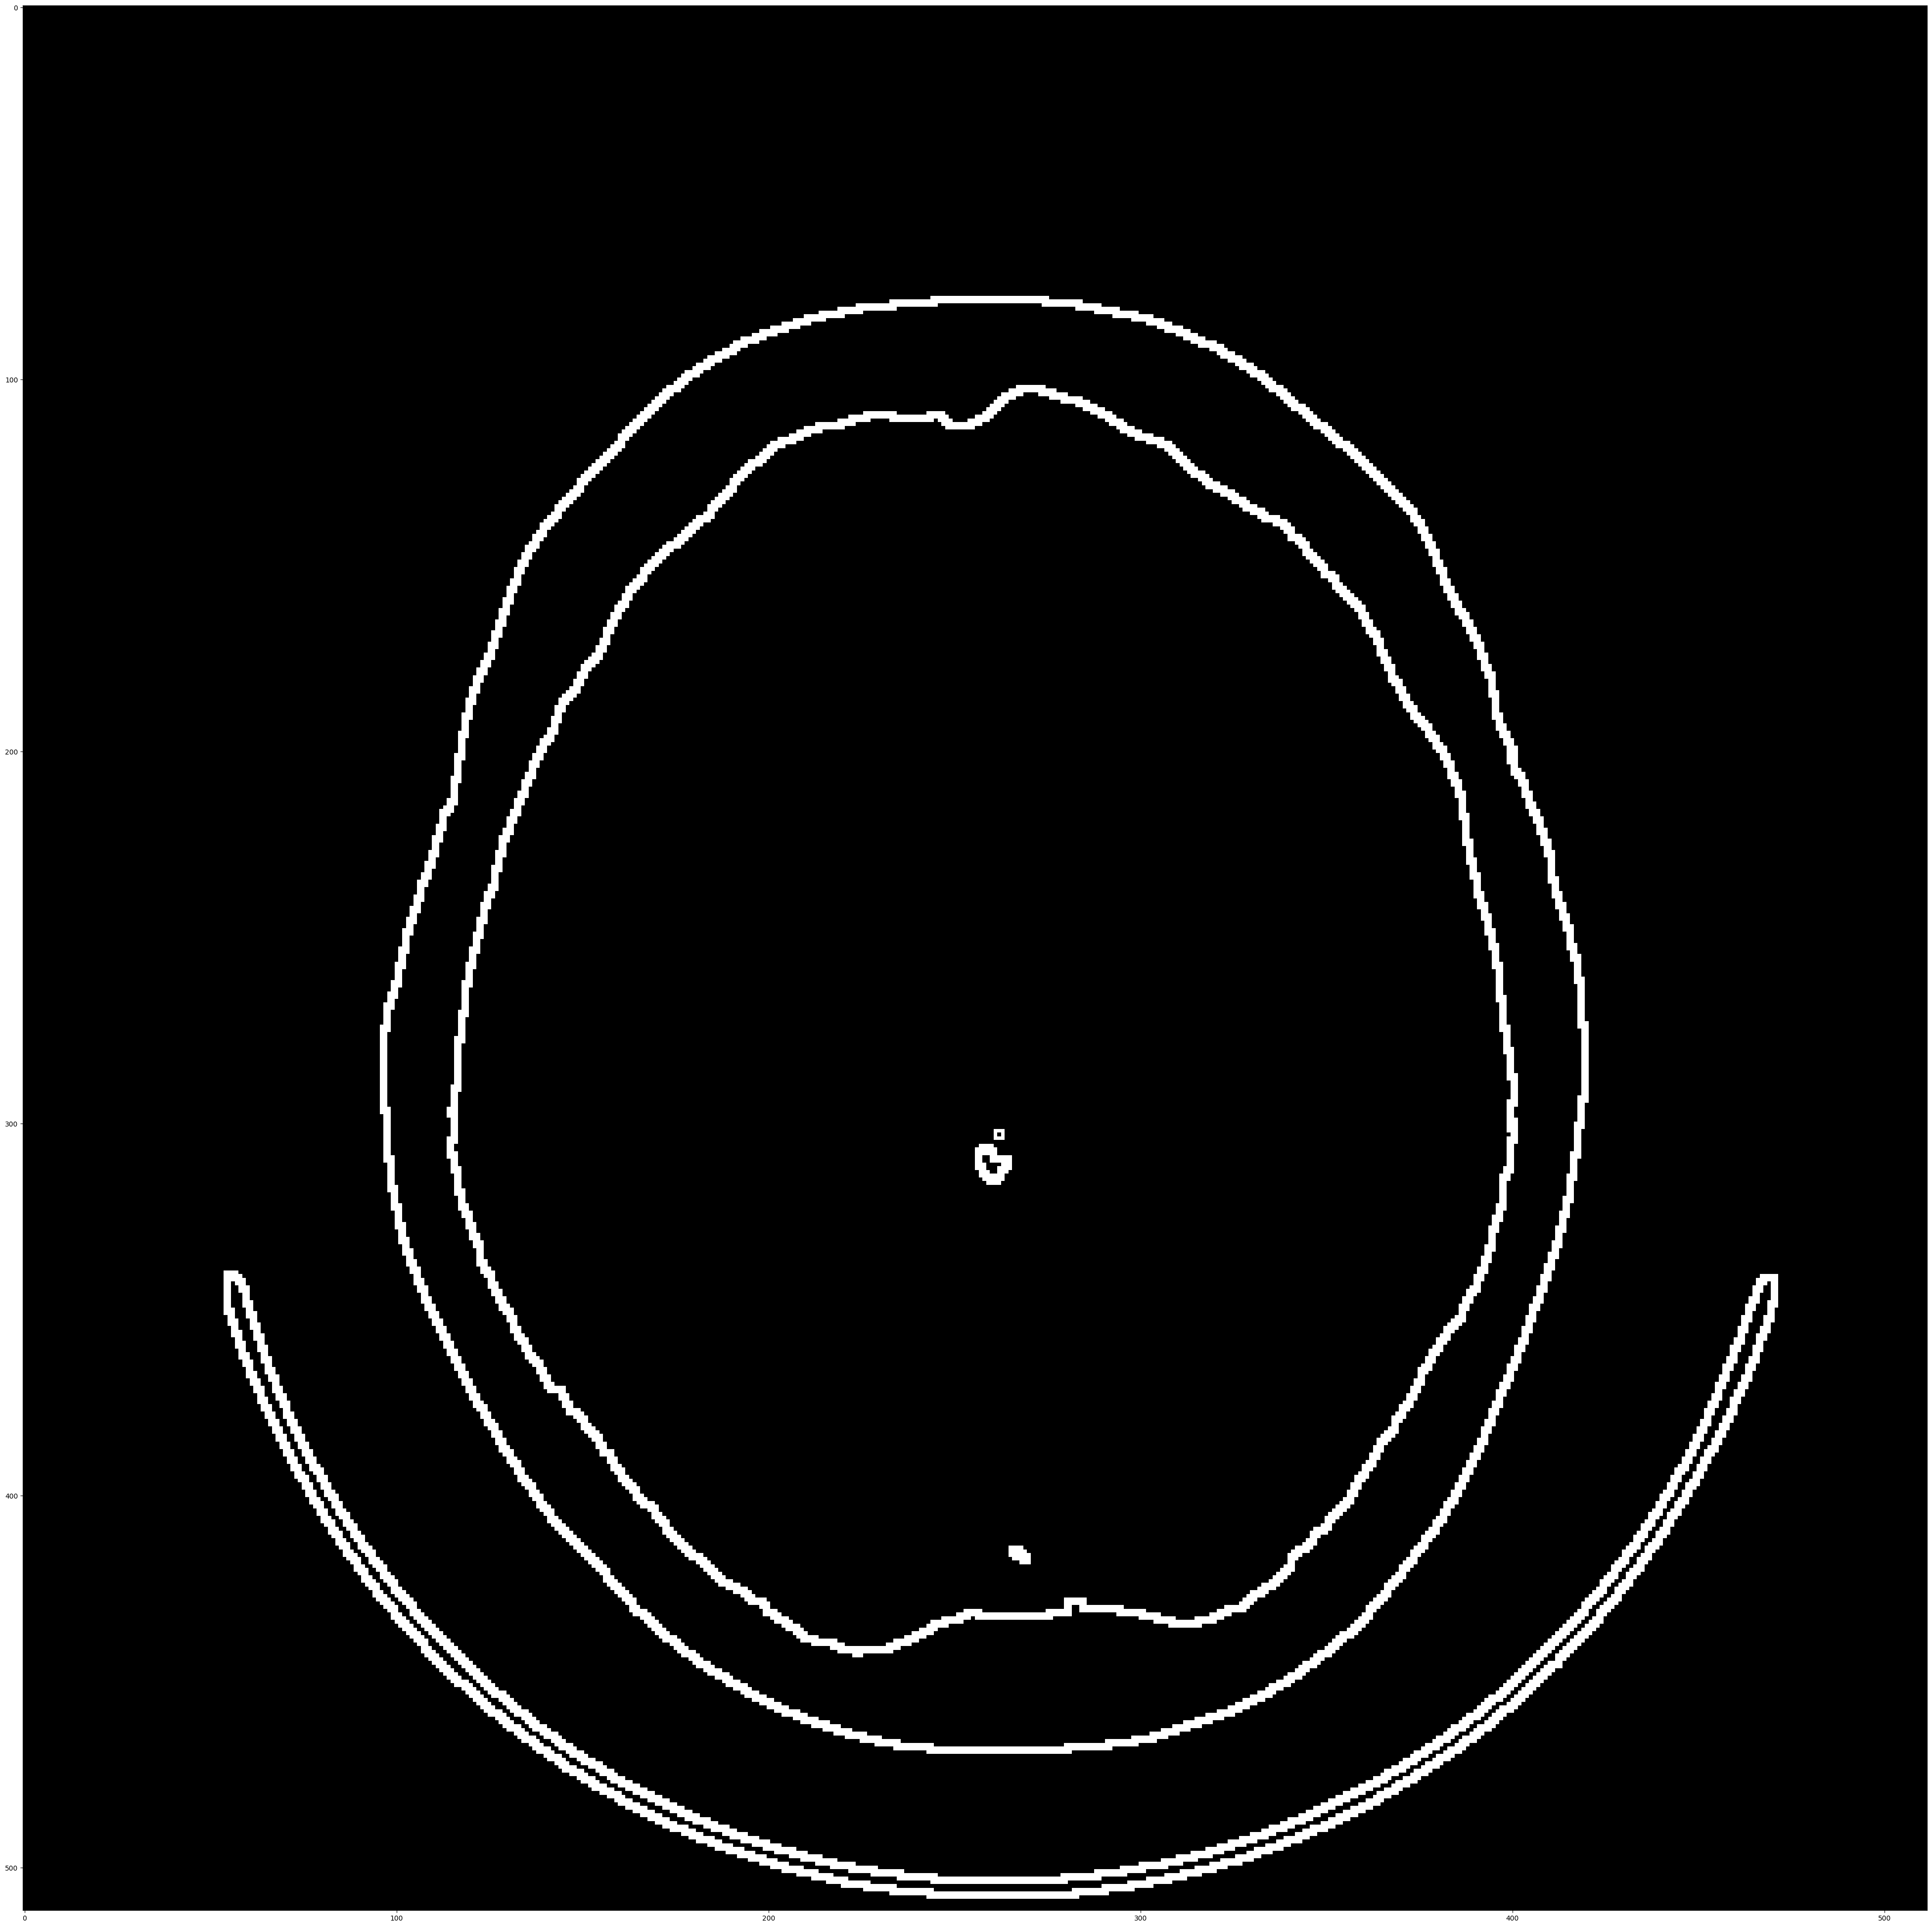

In [53]:
arraynp = np.where(edges >=0.25,1,0)
fig,ax = plt.subplots(figsize=(50,50))
ax.imshow(arraynp,cmap = "gray")

state = 0 # 0 Means wating for the first, 1 waiting for the second
pixel_jumps = 1
indice_x = 0
indice_y = 0
count = 0
intern_count = 0
arraynp_trans = np.transpose(arraynp)
for x in arraynp:
    buffer = pixel_jumps
    for y in x:
        if y == 1 and state == 0:
            state = 1
            buffer = pixel_jumps
            intern_count+=1
            continue
        if state == 1:
            count+=1
            if buffer == 0:
                if y == 0:
                    count+=1
                    arraynp[indice_x,indice_y+intern_count] = 1
                else:
                    state = 0
                    
            else:
                if y == 1 and state == 1:
                    state = 0
                buffer -= 1
        indice_y+=1
    state = 0
    indice_y = 0
    intern_count = 0
    indice_x+=1
fig,ax = plt.subplots(figsize=(50,50))
ax.imshow(arraynp,cmap = "gray")
print(indice_y)

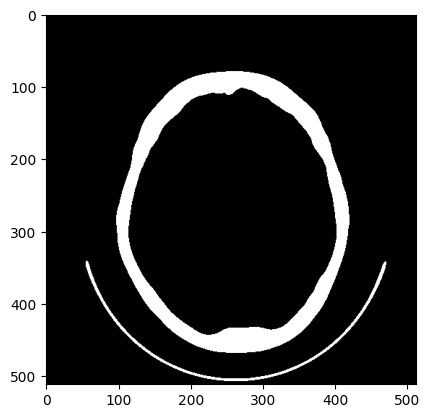

In [54]:
img_2 = pydicom.dcmread(path).pixel_array

#limiarização binária com limiar 230
_, img_2_th = cv2.threshold(img_2, 100, 1000, cv2.THRESH_BINARY)
plt.imshow(img_2_th, cmap="gray")

### Operações de floodfill e bitwise para fazer uma mascara da região interna da cabeça

imagem original com otsu
imagem com floodfill
imagem com floodfill invertido


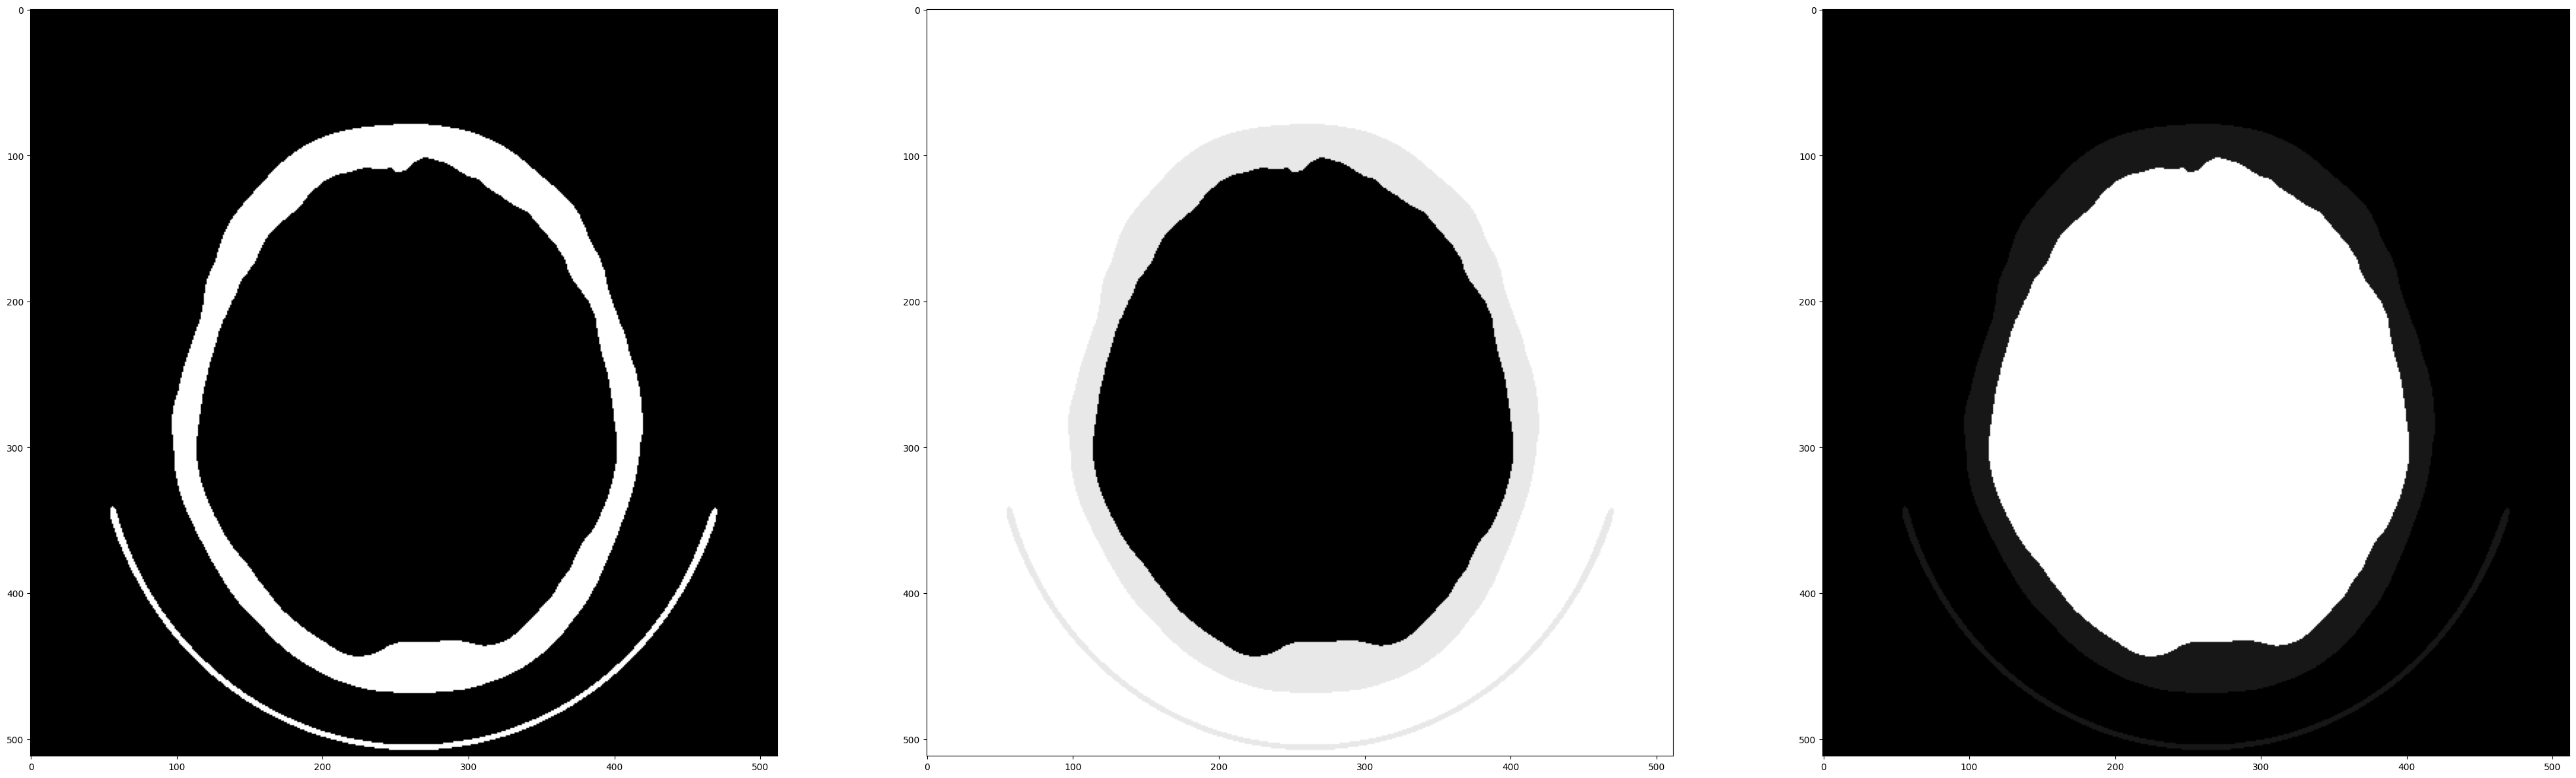

In [125]:
im_floodfill = make_jan(image = img_2_th, janelamento = np.arange(0,1001))
im_floodfill = im_floodfill.astype(np.uint8)

# máscara para aplicação do floodfill
h, w = img_2_th.shape[:2]
mask = np.zeros((h+2, w+2), np.uint8)

# preenchimento externo
img_out=cv2.floodFill(im_floodfill, mask, (0,0), (255,255,255));

# inversão da imagem
im_floodfill_inv = cv2.bitwise_not(im_floodfill)

fig,ax = plt.subplots(1,3,figsize=(50,50))
print("imagem original com otsu")
ax[0].imshow(img_2_th,cmap = "gray")
print("imagem com floodfill")
ax[1].imshow(im_floodfill,cmap = "gray")
print("imagem com floodfill invertido")
ax[2].imshow(im_floodfill_inv,cmap = "gray")


In [56]:
mask.shape

(514, 514)

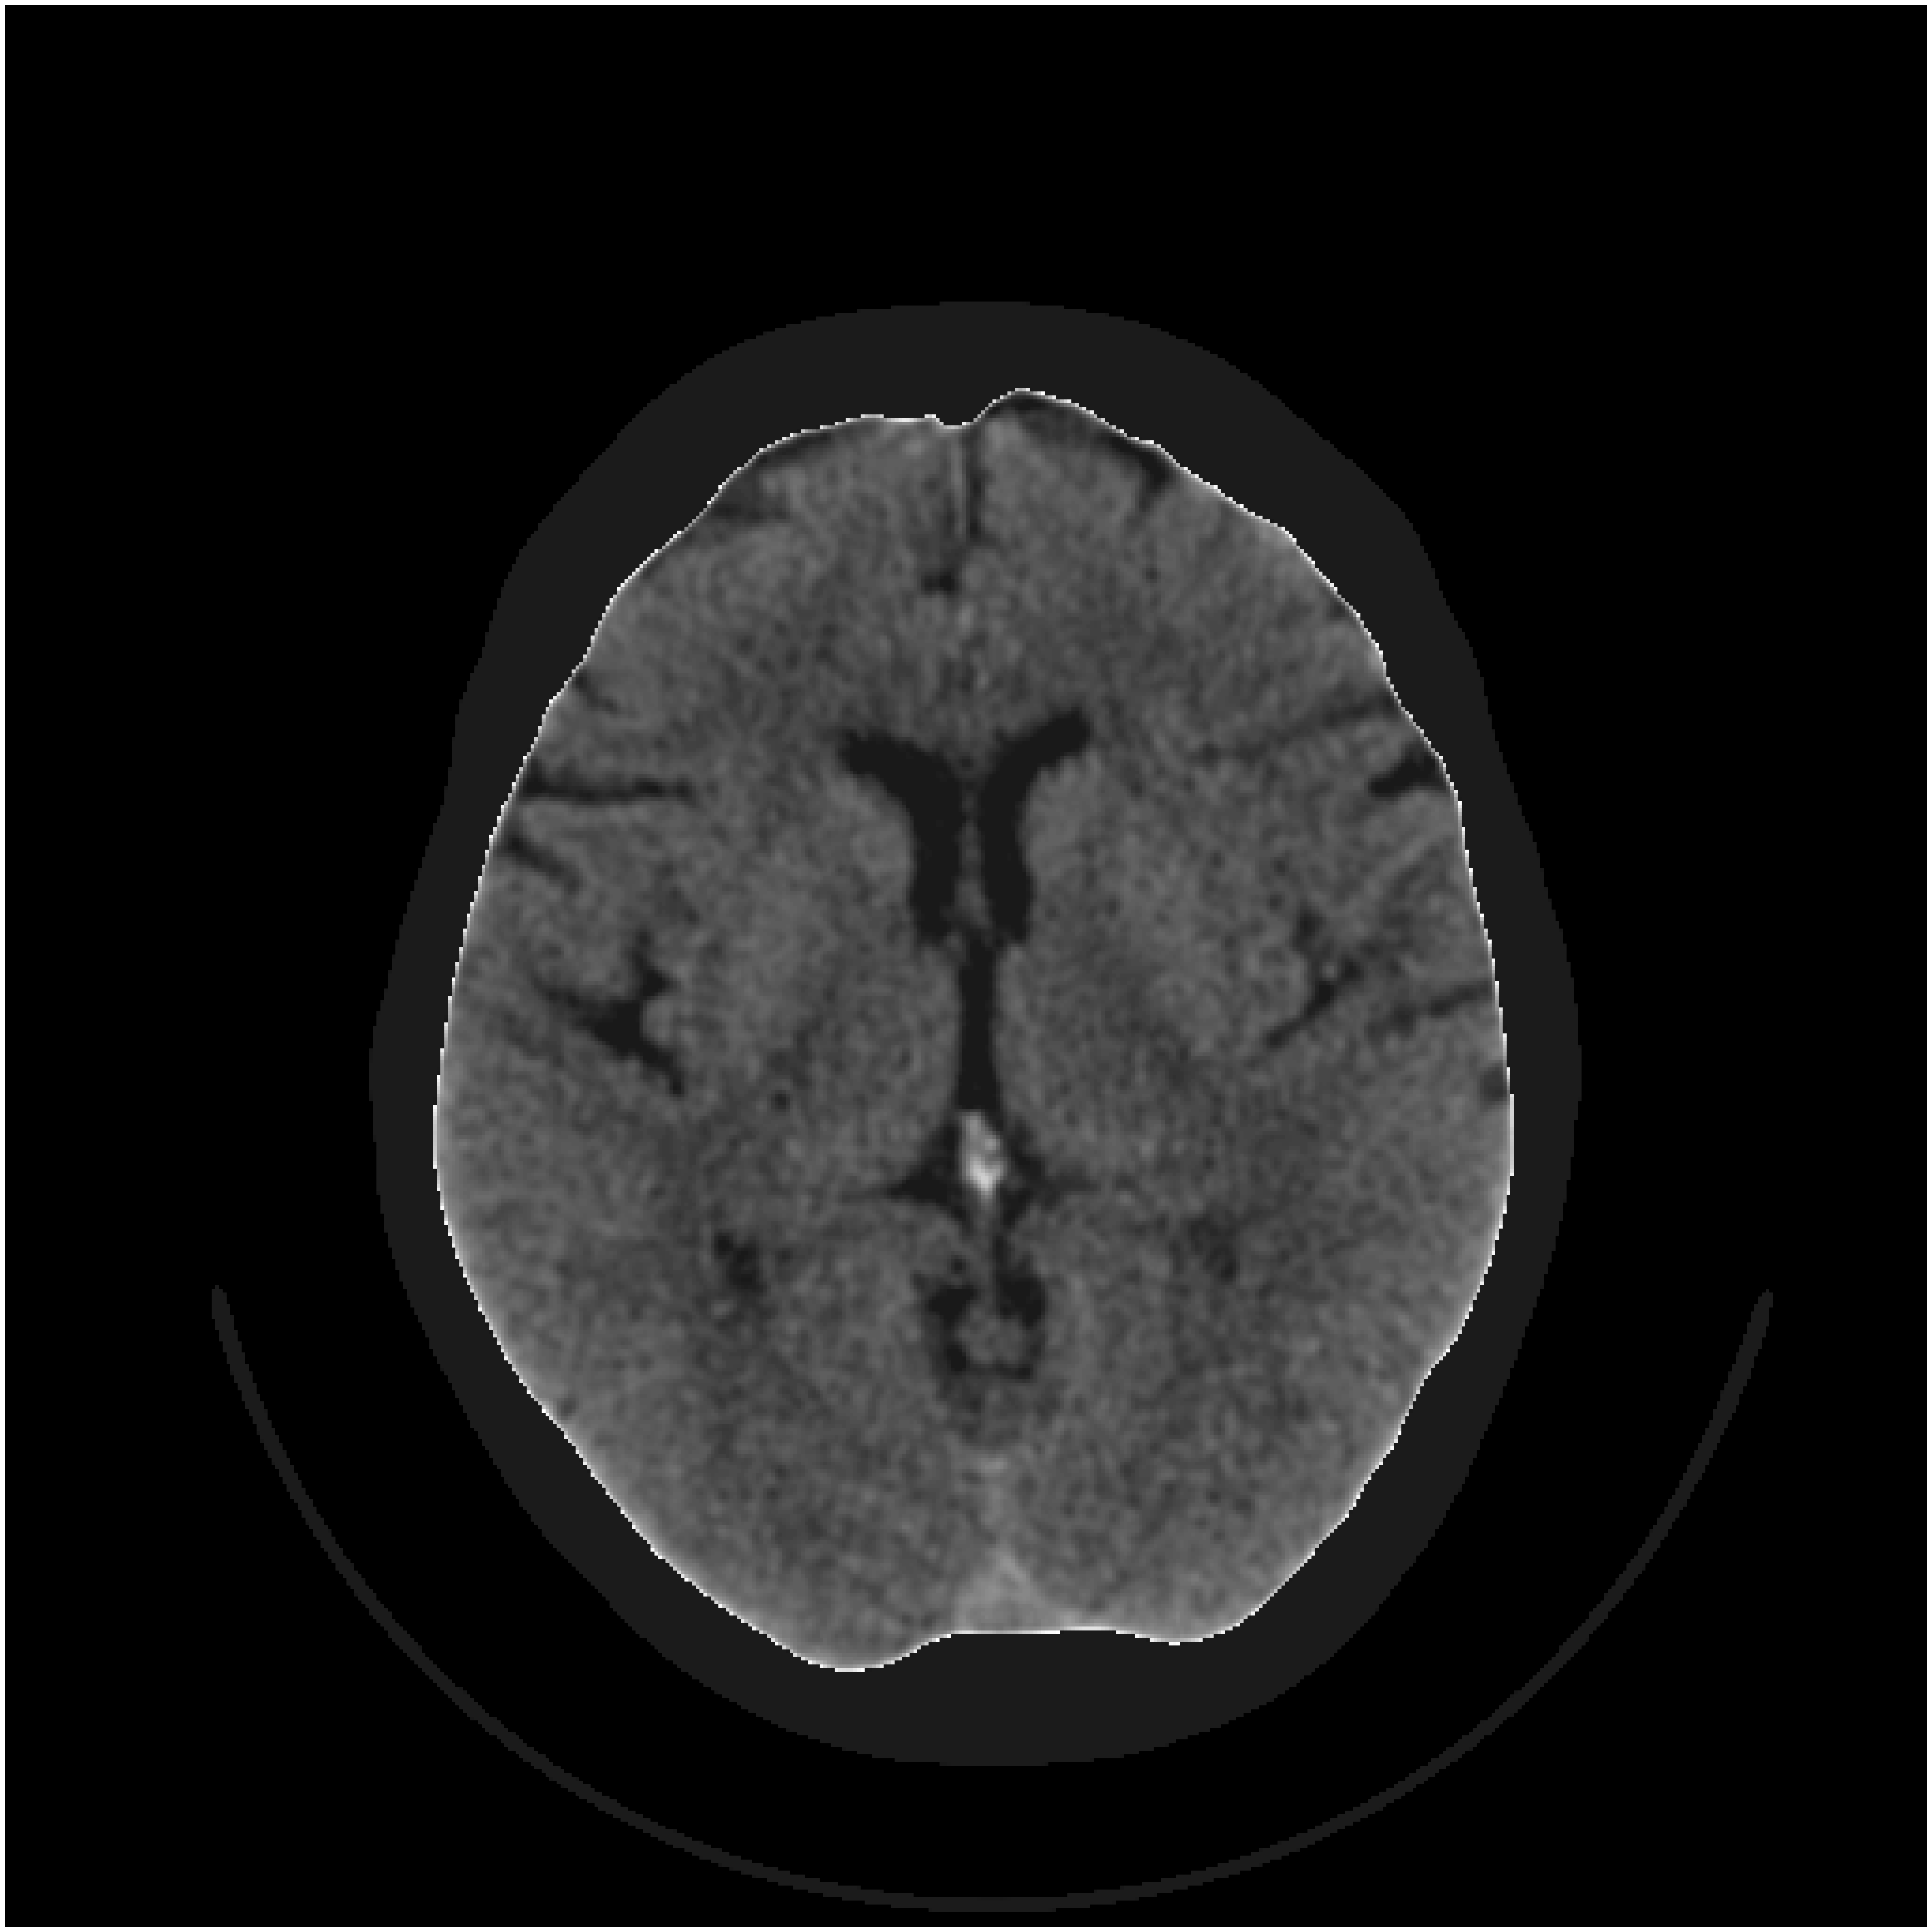

In [110]:
img_pat = img_jan*im_floodfill_inv
ig,ax = plt.subplots(figsize=(50,50))
ax.imshow(img_pat,cmap = "gray")
plt.gca().set_axis_off()

### Calculando a média com o kernel 5x5:

In [58]:
media = cv2.blur(img_jan,(5,5))
media_list = []
for x in media:
    for y in x:
        if y not in media_list:
            media_list.append(y)
media

array([[10, 10, 10, ..., 10, 10, 10],
       [10, 10, 10, ..., 10, 10, 10],
       [10, 10, 10, ..., 10, 10, 10],
       ...,
       [10, 10, 10, ..., 10, 10, 10],
       [10, 10, 10, ..., 10, 10, 10],
       [10, 10, 10, ..., 10, 10, 10]], dtype=int16)

## Algoritmo para remover o ventrículo

(512, 512)

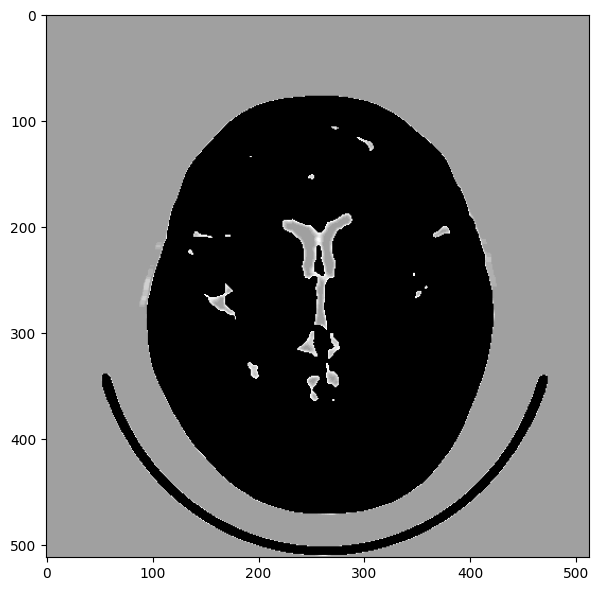

In [75]:
media = np.where(media<17,media,0)
ig,ax = plt.subplots(figsize=(7,50))
ax.imshow(media,cmap = "gray")
media.shape


### Isolando a patologia com uma operação de bitwise

In [60]:
media.shape

(512, 512)

In [62]:
resultimage = cv2.bitwise_and(media,im_floodfill_inv, mask = None)
ig,ax = plt.subplots(figsize=(50,50))
ax.imshow(resultimage,cmap = "gray")

error: OpenCV(4.8.0) /io/opencv/modules/core/src/arithm.cpp:212: error: (-209:Sizes of input arguments do not match) The operation is neither 'array op array' (where arrays have the same size and type), nor 'array op scalar', nor 'scalar op array' in function 'binary_op'


In [65]:
print("Shape of media:", media.shape)
print("Type of media:", media.dtype)
print("Shape of im_floodfill_inv:", im_floodfill_inv.shape)
print("Type of im_floodfill_inv:", im_floodfill_inv.dtype)

Shape of media: (512, 512)
Type of media: uint8
Shape of im_floodfill_inv: (512, 512)
Type of im_floodfill_inv: uint8


Shape of media: (512, 512)
Type of media: int16
Shape of im_floodfill_inv: (512, 512)
Type of im_floodfill_inv: uint8


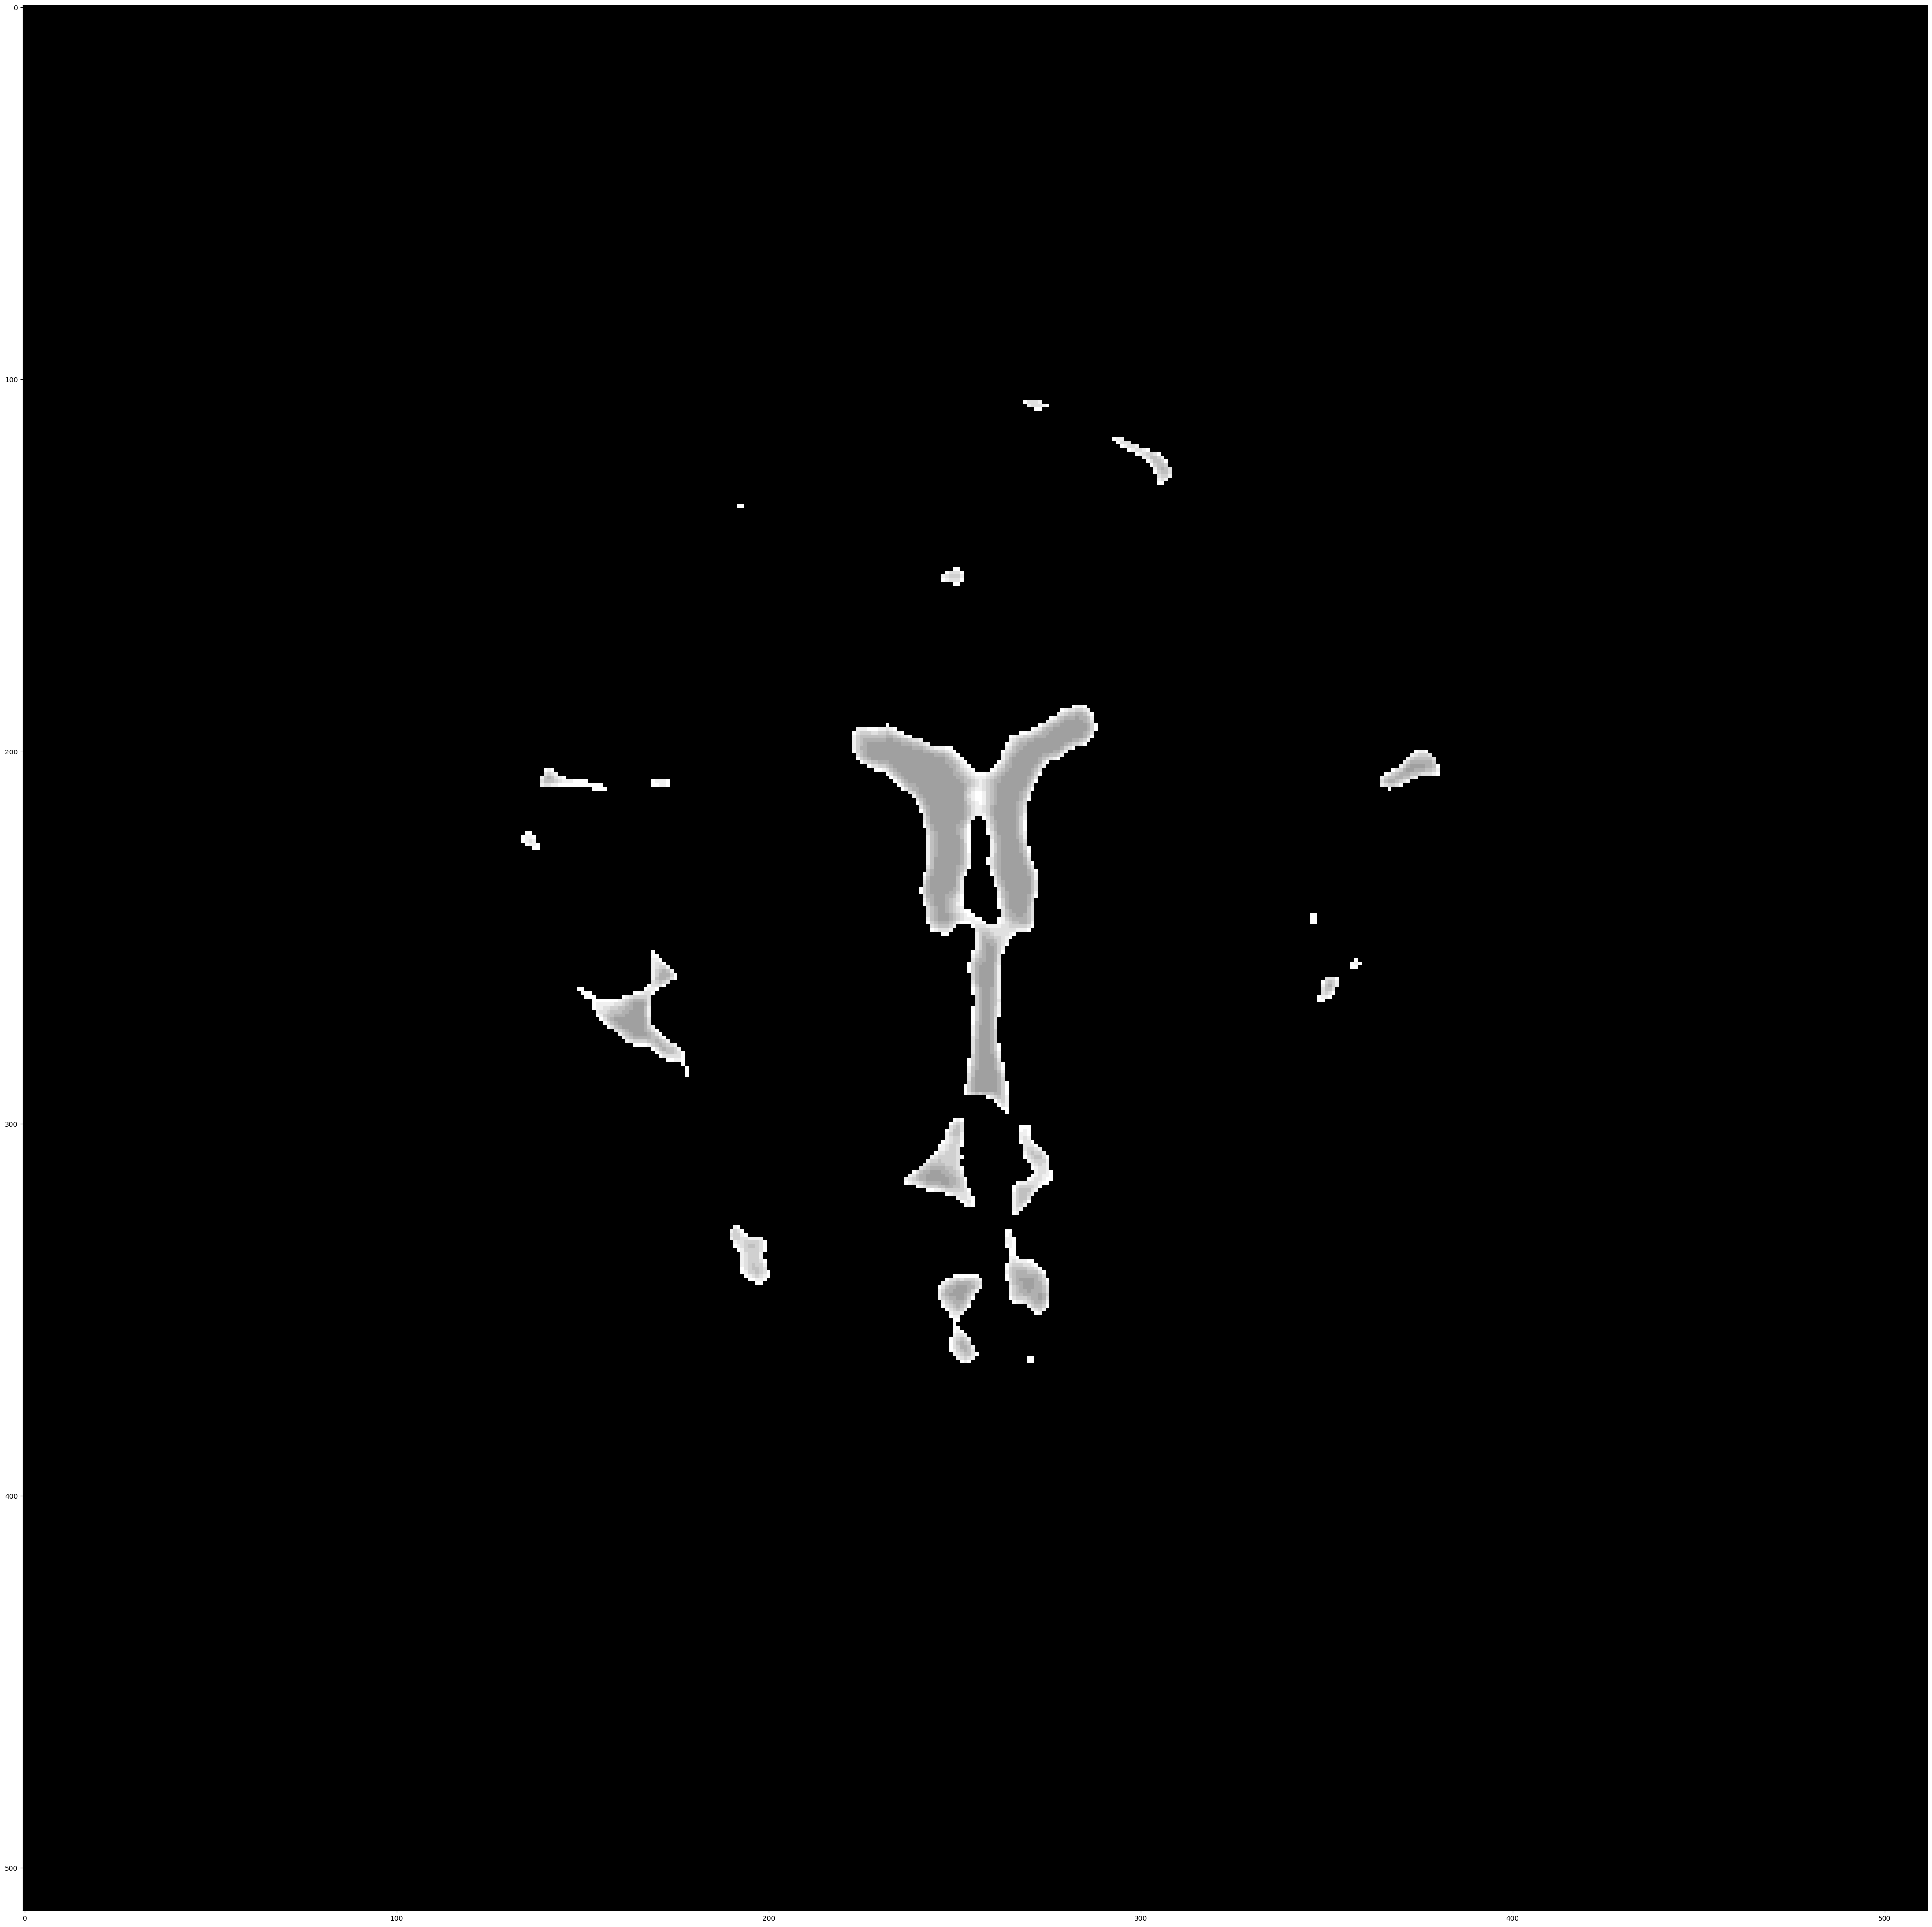

In [64]:
# Ensure both arrays have the same data type, e.g., uint8
if media.dtype != 'uint8':
    media = media.astype('uint8')
if im_floodfill_inv.dtype != 'uint8':
    im_floodfill_inv = im_floodfill_inv.astype('uint8')

# Check for and remove extra dimensions if necessary
if len(media.shape) > 2:
    media = media.squeeze()
if len(im_floodfill_inv.shape) > 2:
    im_floodfill_inv = im_floodfill_inv.squeeze()

resultimage = cv2.bitwise_and(media, im_floodfill_inv, mask=None)
fig, ax = plt.subplots(figsize=(50, 50))
ax.imshow(resultimage, cmap="gray")
plt.show()

### Erosão para retirar pequenos erros

In [ ]:
#number = 11
#kernel = np.ones((2,1))
#image_eroded = cv2.erode(resultimage, kernel,iterations = 2)
#image_dilated = cv2.dilate(image_eroded,kernel,iterations = 10)
#ig,ax = plt.subplots(1,2,figsize=(50,50))
#ax[0].imshow(image_eroded,cmap = "gray")
#ax[1].imshow(image_dilated,cmap = "gray")

###  Preenchimento da patologia para marcação na imagem

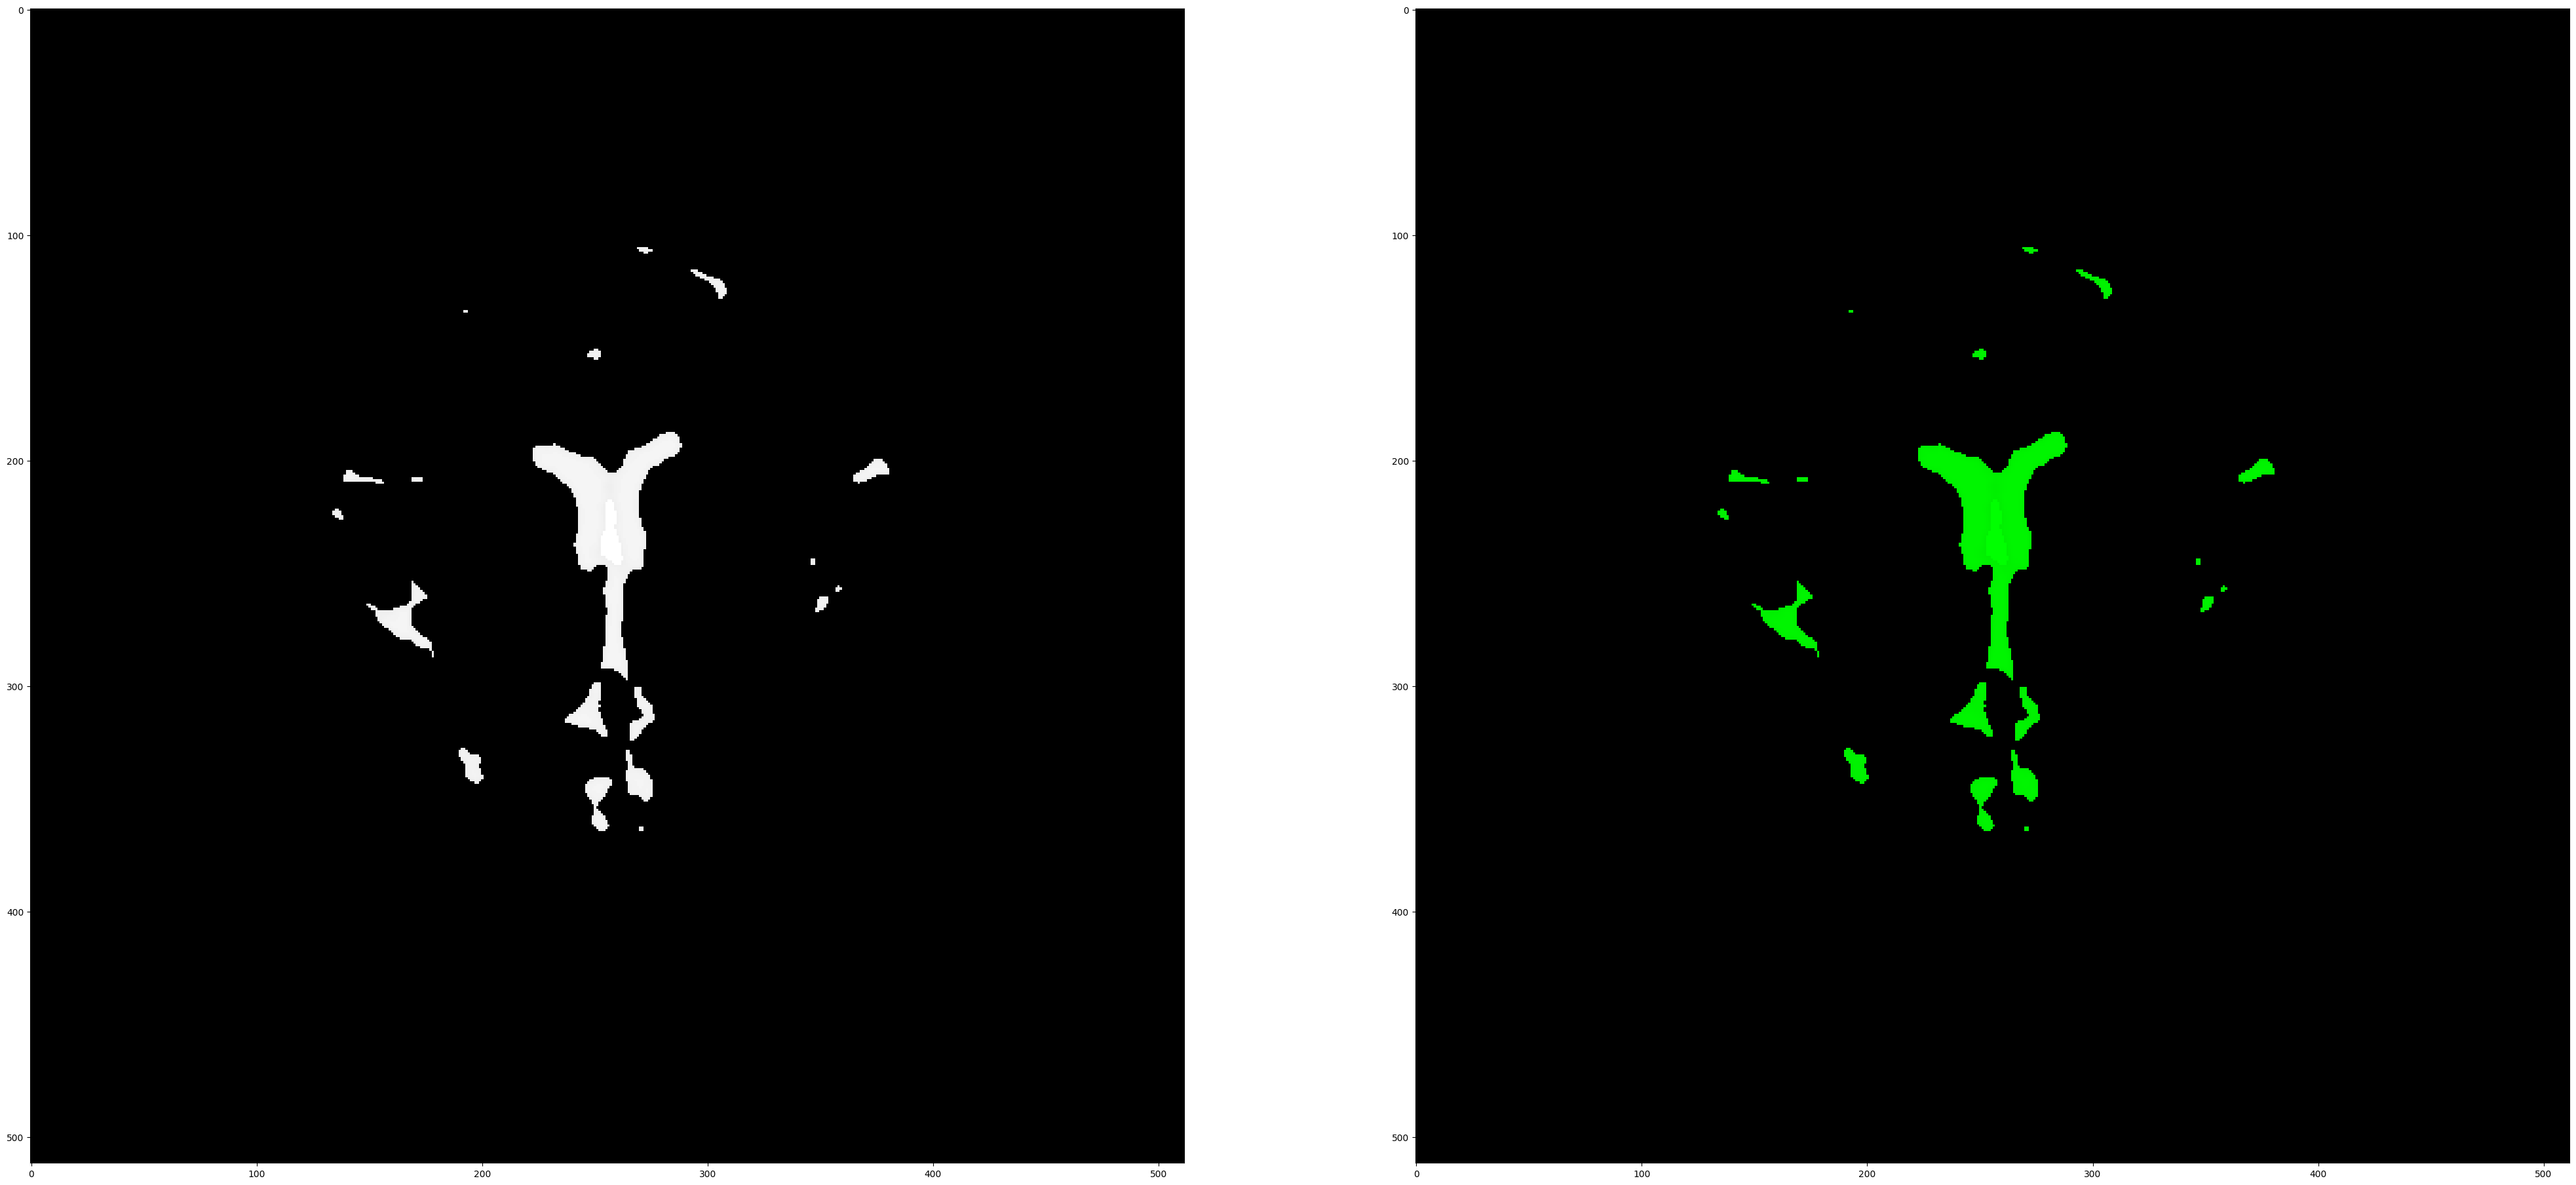

In [66]:
img_to_floodfill = resultimage.copy()
img_floodfill = cv2.floodFill(img_to_floodfill,None,(0,0),255)
inv_floodfill = cv2.bitwise_not(img_floodfill[1])
mask = cv2.cvtColor(inv_floodfill,cv2.COLOR_GRAY2BGR)
mask[:,:,0] = 0
mask[:,:,2] = 0
fig,ax = plt.subplots(1,2,figsize=(50,50))
ax[0].imshow(inv_floodfill,cmap = "gray")
ax[1].imshow(mask,cmap = "gray")

### Juntando a mascara com a imagem original para ter a marcação da patologia em verde

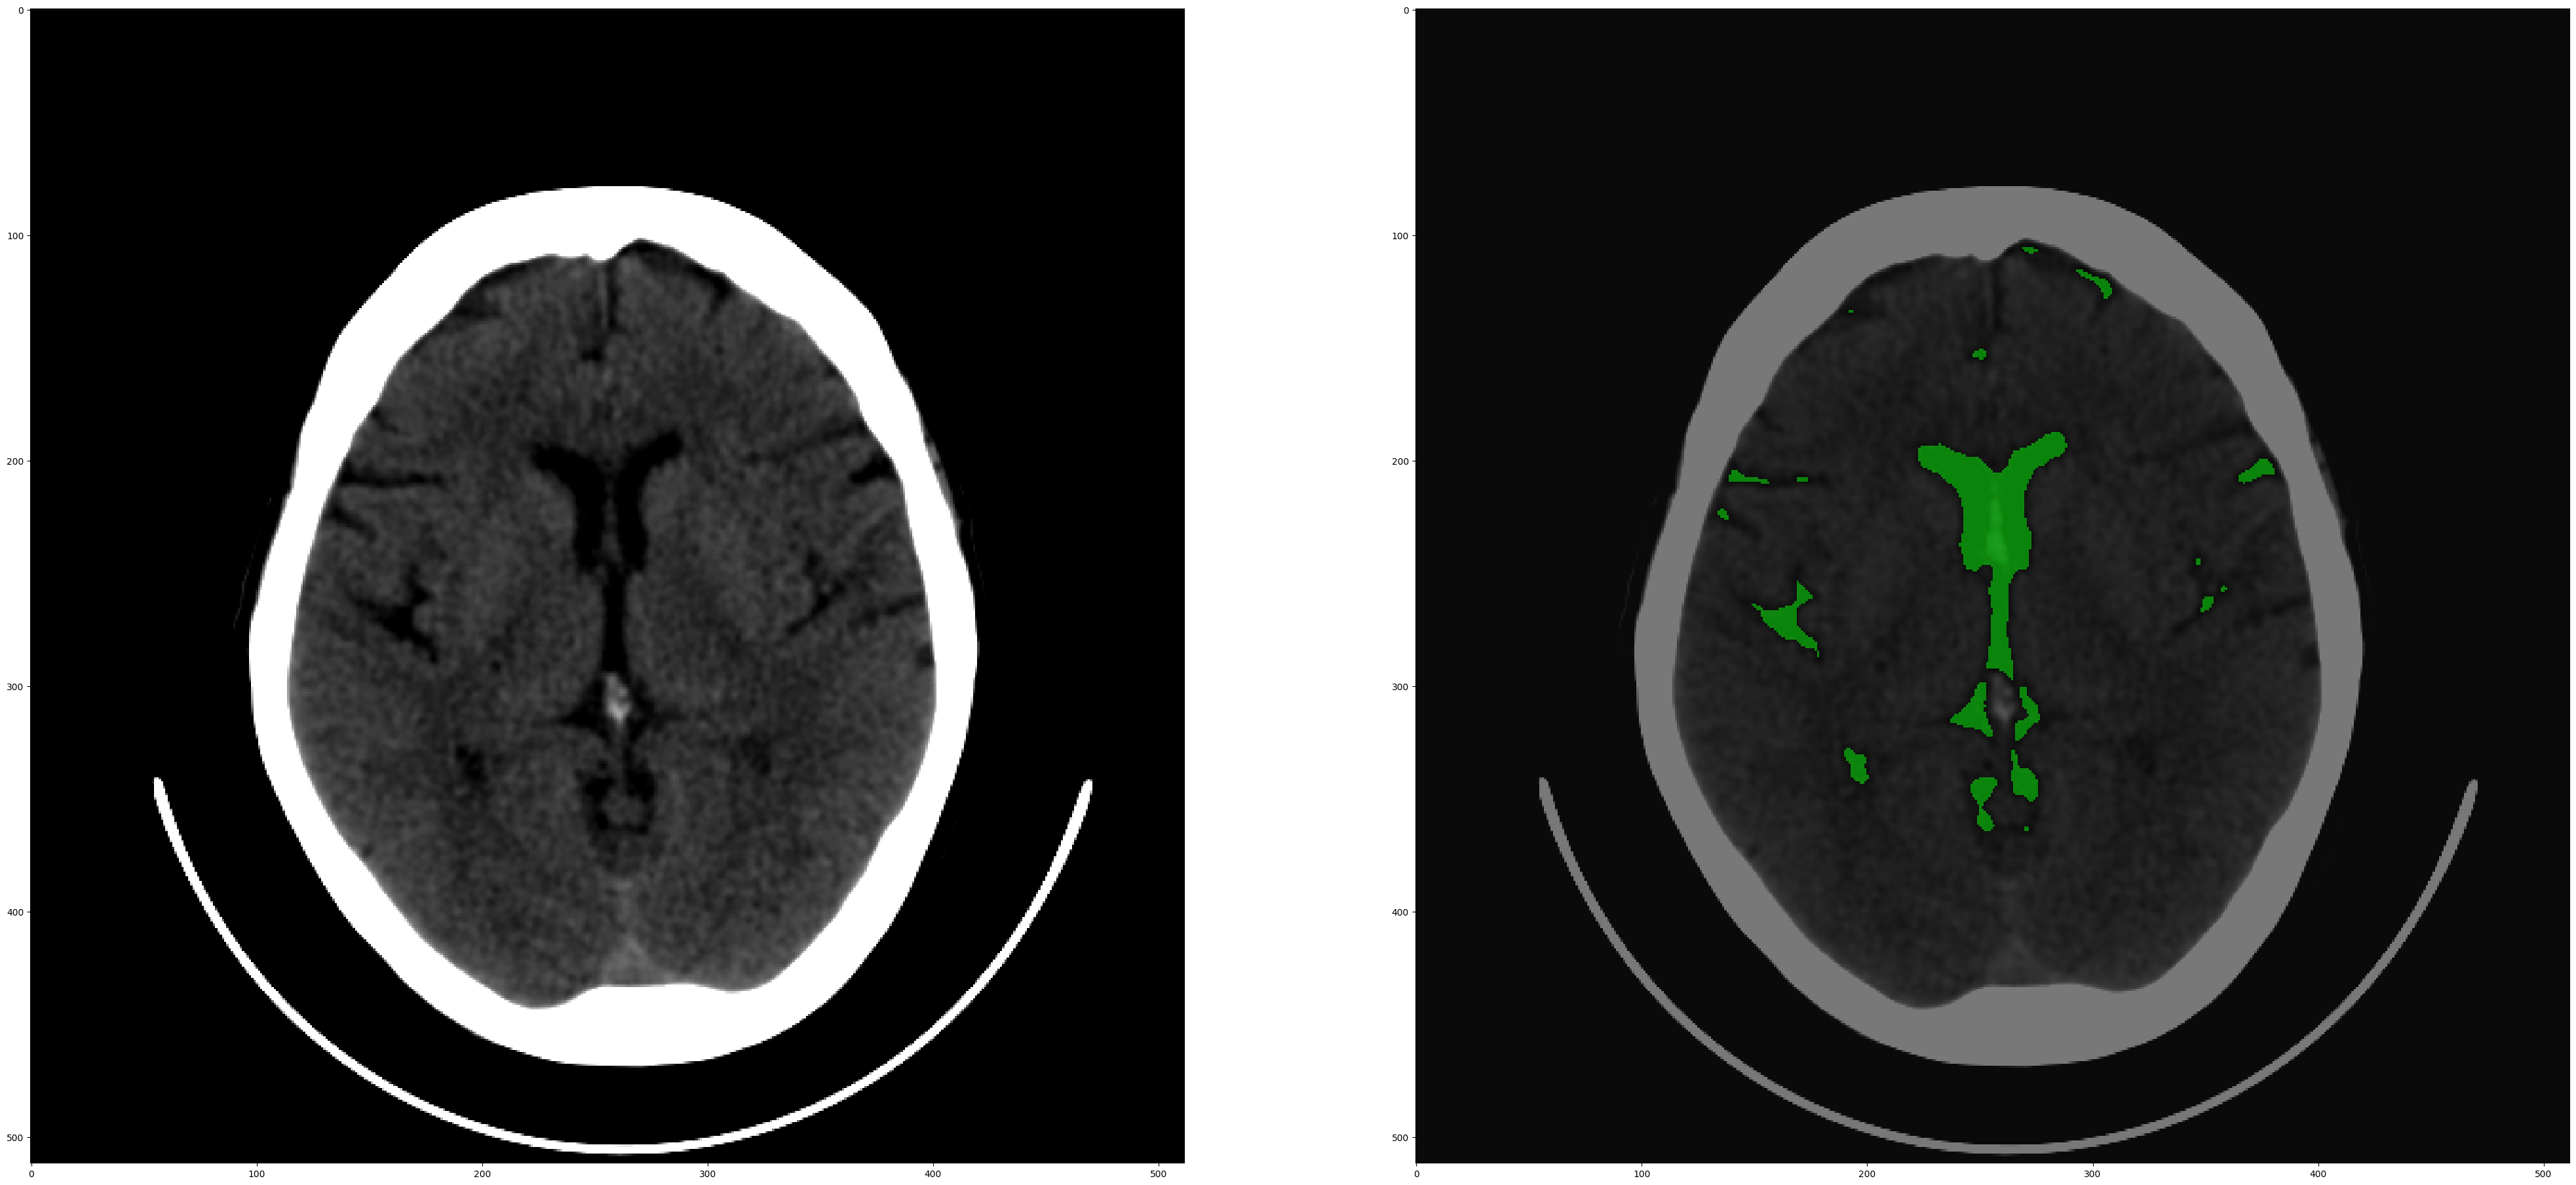

In [68]:
# Convert img_jan to 8-bit grayscale before color conversion
img_jan_8bit = cv2.convertScaleAbs(img_jan)

final_image = cv2.addWeighted(cv2.cvtColor(img_jan_8bit,cv2.COLOR_GRAY2BGR),1,mask,0.5,0)
fig,ax = plt.subplots(1,2,figsize=(50,50))
ax[0].imshow(img_jan,cmap = "gray")
ax[1].imshow(final_image,cmap = "gray")

In [67]:
final_image = cv2.addWeighted(cv2.cvtColor(img_jan,cv2.COLOR_GRAY2BGR),1,mask,0.5,0)
fig,ax = plt.subplots(1,2,figsize=(50,50))
ax[0].imshow(img_jan,cmap = "gray")
ax[1].imshow(final_image,cmap = "gray")

error: OpenCV(4.8.0) /io/opencv/modules/imgproc/src/color.simd_helpers.hpp:94: error: (-2:Unspecified error) in function 'cv::impl::{anonymous}::CvtHelper<VScn, VDcn, VDepth, sizePolicy>::CvtHelper(cv::InputArray, cv::OutputArray, int) [with VScn = cv::impl::{anonymous}::Set<1>; VDcn = cv::impl::{anonymous}::Set<3, 4>; VDepth = cv::impl::{anonymous}::Set<0, 2, 5>; cv::impl::{anonymous}::SizePolicy sizePolicy = cv::impl::<unnamed>::NONE; cv::InputArray = const cv::_InputArray&; cv::OutputArray = const cv::_OutputArray&]'
> Unsupported depth of input image:
>     'VDepth::contains(depth)'
> where
>     'depth' is 3 (CV_16S)
